In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv('/content/^NSEI.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,6301.250000,6358.299805,6211.299805,6221.149902,6221.149902,158100.0
1,2014-01-03,6194.549805,6221.700195,6171.250000,6211.149902,6211.149902,139000.0
2,2014-01-06,6220.850098,6224.700195,6170.250000,6191.450195,6191.450195,118300.0
3,2014-01-07,6203.899902,6221.500000,6144.750000,6162.250000,6162.250000,138600.0
4,2014-01-08,6178.049805,6192.100098,6160.350098,6174.600098,6174.600098,146900.0
...,...,...,...,...,...,...,...
1225,2018-12-21,10944.250000,10963.650391,10738.650391,10754.000000,10754.000000,377500.0
1226,2018-12-24,10780.900391,10782.299805,10649.250000,10663.500000,10663.500000,223400.0
1227,2018-12-26,10635.450195,10747.500000,10534.549805,10729.849609,10729.849609,263700.0
1228,2018-12-27,10817.900391,10834.200195,10764.450195,10779.799805,10779.799805,456100.0


In [60]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,6301.250000,6358.299805,6211.299805,6221.149902,6221.149902,158100.0
1,2014-01-03,6194.549805,6221.700195,6171.250000,6211.149902,6211.149902,139000.0
2,2014-01-06,6220.850098,6224.700195,6170.250000,6191.450195,6191.450195,118300.0
3,2014-01-07,6203.899902,6221.500000,6144.750000,6162.250000,6162.250000,138600.0
4,2014-01-08,6178.049805,6192.100098,6160.350098,6174.600098,6174.600098,146900.0
5,2014-01-09,6181.700195,6188.049805,6148.250000,6168.350098,6168.350098,150100.0
6,2014-01-10,6178.850098,6239.100098,6139.600098,6171.450195,6171.450195,159900.0
7,2014-01-13,6189.549805,6288.200195,6189.549805,6272.750000,6272.750000,135000.0
8,2014-01-14,6260.250000,6280.350098,6234.149902,6241.850098,6241.850098,110200.0
9,2014-01-15,6265.950195,6325.200195,6265.299805,6320.899902,6320.899902,145900.0


In [61]:
df.shape

(1230, 7)

In [62]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000
mean,8830.689674,8868.214392,8779.043764,8823.964922,8823.964922,192950.327869
std,1322.591089,1322.044772,1318.170646,1320.040623,1320.040623,74509.699915
min,5947.600098,6017.799805,5933.299805,6000.899902,6000.899902,0.000000
25%,7910.900024,7944.324951,7871.025025,7911.999878,7911.999878,147475.000000
50%,8541.625000,8587.724609,8504.750000,8535.250000,8535.250000,178300.000000
75%,10069.962158,10114.924805,10022.274658,10079.849854,10079.849854,221025.000000
max,11751.799805,11760.200195,11710.500000,11738.500000,11738.500000,719000.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1230 non-null   object 
 1   Open       1220 non-null   float64
 2   High       1220 non-null   float64
 3   Low        1220 non-null   float64
 4   Close      1220 non-null   float64
 5   Adj Close  1220 non-null   float64
 6   Volume     1220 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.4+ KB


In [64]:
df.nunique()
#This Implies that each Data is numerical and not categorical

Date         1230
Open         1212
High         1211
Low          1214
Close        1211
Adj Close    1211
Volume        871
dtype: int64

In [65]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  1230


,Total Missing,In Percent
Open,10,0.81
High,10,0.81
Low,10,0.81
Close,10,0.81
Adj Close,10,0.81
Volume,10,0.81
Date,0,0.00


In [66]:
df.dropna(inplace=True)

In [67]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  1220


,Total Missing,In Percent
Date,0,0.0
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Adj Close,0,0.0
Volume,0,0.0


<Axes: >

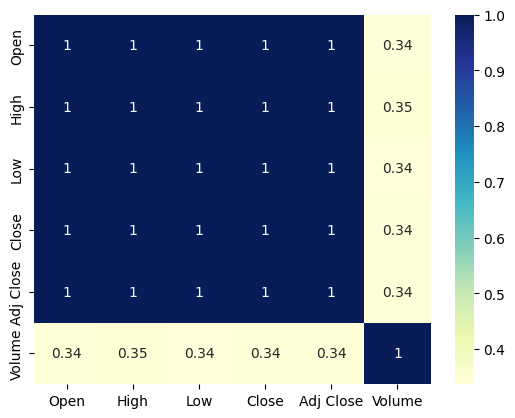

In [68]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="YlGnBu")

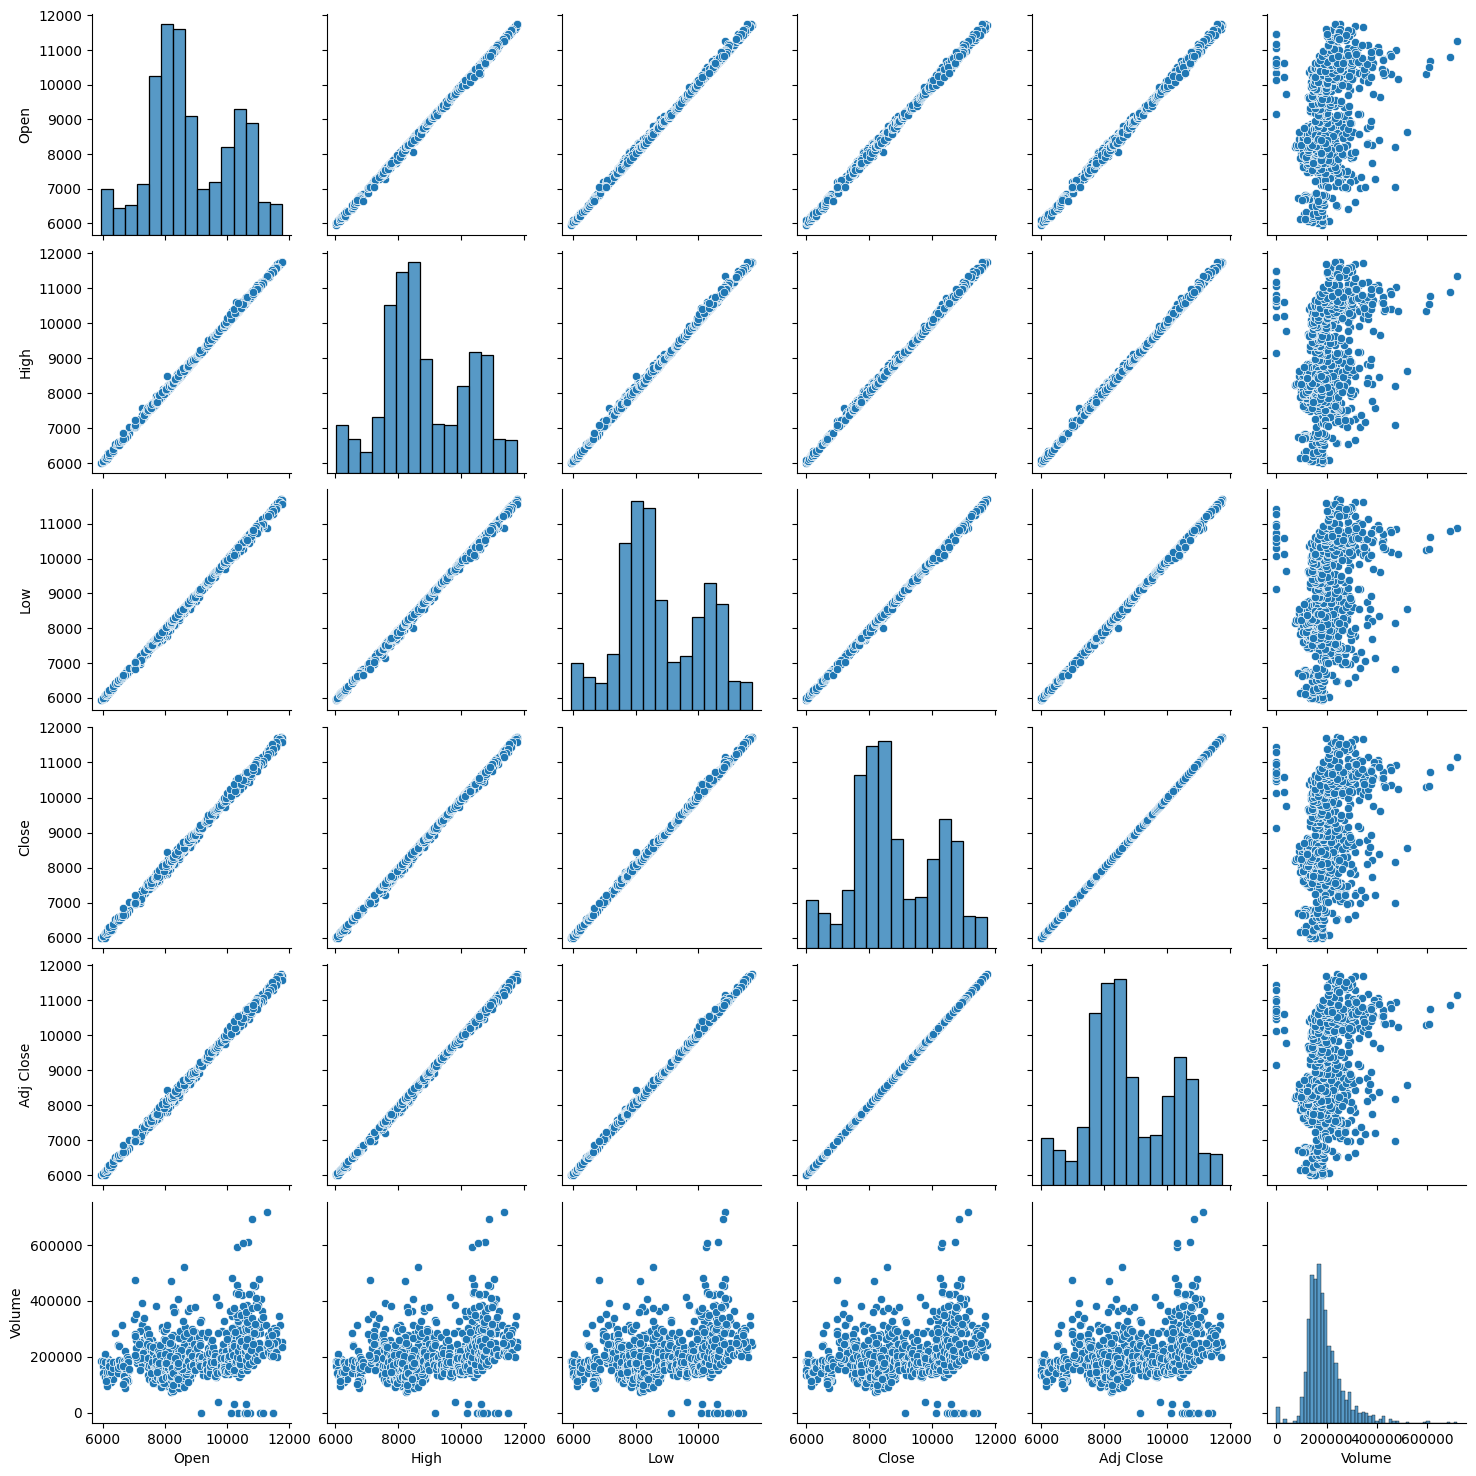

In [69]:
sns.pairplot(df)

In [70]:
target_column = 'Close'
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']  # Add other relevant columns
X = df[features]
y = df[target_column]

In [71]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [72]:
X.head()

,Open,High,Low,Adj Close,Volume
0,6301.250000,6358.299805,6211.299805,6221.149902,158100.0
1,6194.549805,6221.700195,6171.250000,6211.149902,139000.0
2,6220.850098,6224.700195,6170.250000,6191.450195,118300.0
3,6203.899902,6221.500000,6144.750000,6162.250000,138600.0
4,6178.049805,6192.100098,6160.350098,6174.600098,146900.0


In [73]:
model.feature_importances_

array([2.54005573e-01, 2.66060817e-01, 1.74818709e-01, 3.05098311e-01,
       1.65908135e-05])

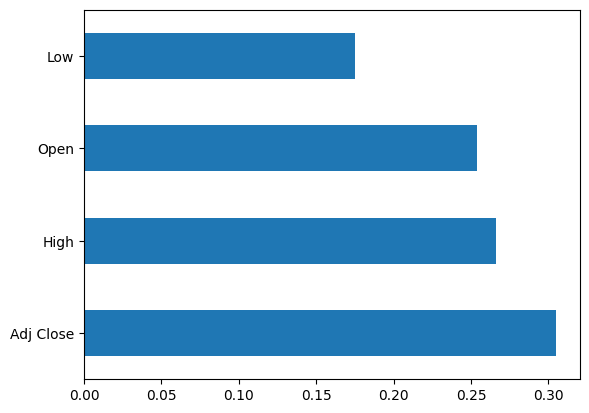

In [74]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

<Axes: xlabel='Close', ylabel='Density'>

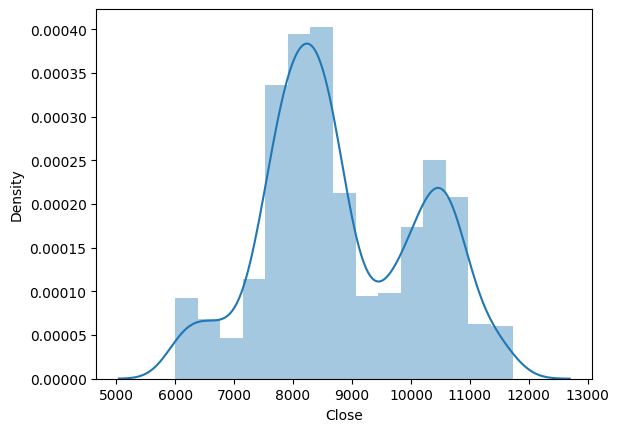

In [75]:
sns.distplot(y)

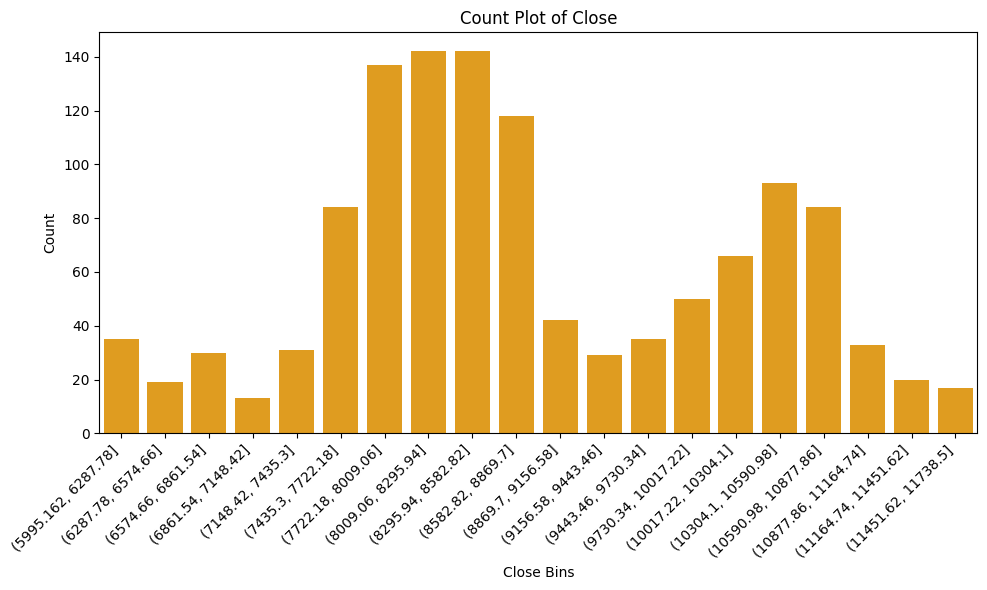

In [76]:
y = df['Close']

# Number of bins for binning the 'PM 2.5' values
num_bins = 20

# Binning the 'PM 2.5' values into discrete categories
binned_pm25 = pd.cut(y, bins=num_bins)

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x=binned_pm25, color='orange')
plt.xlabel('Close Bins')
plt.ylabel('Count')
plt.title('Count Plot of Close')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [77]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_outlier_boundary = Q1 - 1.5 * IQR
upper_outlier_boundary = Q3 + 1.5 * IQR

# Identify the outliers
outliers = y[(y < lower_outlier_boundary) | (y > upper_outlier_boundary)]

# Display the outliers
print("Outliers:")
print(outliers)

Outliers:
Series([], Name: Close, dtype: float64)


In [78]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [79]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 165633 (647.00 KB)
Trainable params: 165633 (647.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 300)


Epoch 1/300
58/58 [==============================] - 0s 5ms/step - loss: 114.8724 - mean_absolute_error: 114.8724 - val_loss: 124.9802 - val_mean_absolute_error: 124.9802
Epoch 2/300
58/58 [==============================] - 0s 4ms/step - loss: 114.5700 - mean_absolute_error: 114.5700 - val_loss: 233.1156 - val_mean_absolute_error: 233.1156
Epoch 3/300
58/58 [==============================] - 0s 4ms/step - loss: 112.0768 - mean_absolute_error: 112.0768 - val_loss: 91.3487 - val_mean_absolute_error: 91.3487
Epoch 4/300
58/58 [==============================] - 0s 4ms/step - loss: 91.6899 - mean_absolute_error: 91.6899 - val_loss: 47.8210 - val_mean_absolute_error: 47.8210
Epoch 5/300
58/58 [==============================] - 0s 3ms/step - loss: 90.2329 - mean_absolute_error: 90.2329 - val_loss: 66.1125 - val_mean_absolute_error: 66.1125
Epoch 6/300
58/58 [==============================] - 0s 3ms/step - loss: 64.5769 - mean_absolute_error: 64.5769 - val_loss: 226.2183 - val_mean_absolute_er

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Predict on the test set
y_pred11 = NN_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred11)
mse = mean_squared_error(y_test, y_pred11)
rmse = mean_squared_error(y_test, y_pred11, squared=False)
r2 = r2_score(y_test, y_pred11)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

12/12 [==============================] - 0s 2ms/step
Mean Absolute Error (MAE): 173.25
Mean Squared Error (MSE): 31493.92
Root Mean Squared Error (RMSE): 177.47
R-squared (R2) Score: 0.98


The r2 score measures the proportion of the variance in the dependent variable (the target) that is predictable from the independent variables (the features) in a regression model.

<Axes: ylabel='Density'>

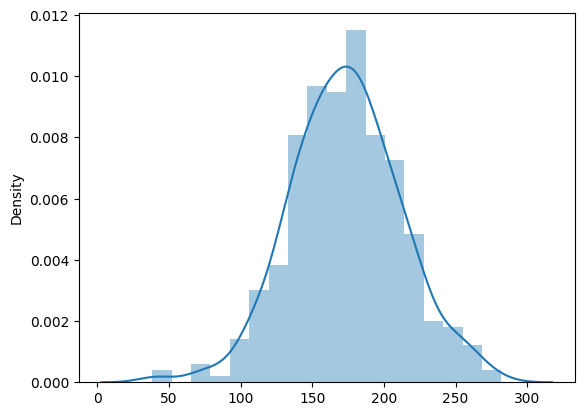

In [83]:
sns.distplot(y_test.values.reshape(-1,1)-y_pred11)


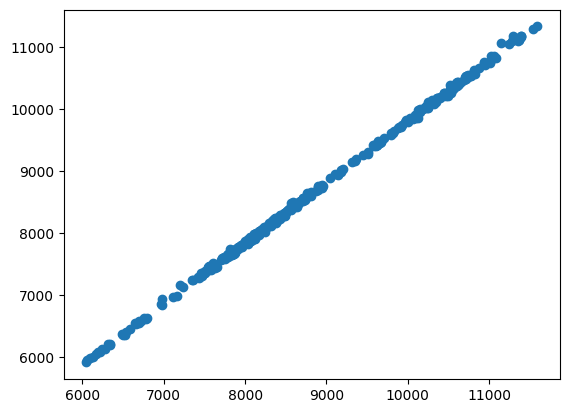

In [84]:
plt.scatter(y_test,y_pred11)
